# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from scipy import stats
from scipy.stats import linregress

import statsmodels.api as sm

In [ ]:
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3] })
student_data.set_index('StudentID', inplace = True)
student_data

In [27]:
# Your code here. 

student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6 , 0, 3]})
student_data.set_index('StudentID', inplace = True)

In [28]:
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

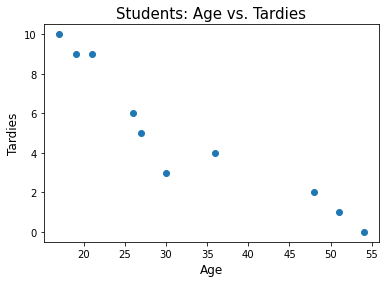

In [29]:
# Your code here.

plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Students: Age vs. Tardies', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Tardies', fontsize=12);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

# there is a clear trend in the minutes that students arrived at class late according to their age.
# hypothesis: the younger the students the later they arrive at class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [40]:
f"La covarianza es {student_data.cov()['Age'][1].round(2)} y la correlación es {student_data.corr()['Age'][1].round(2)}."

'La covarianza es -45.57 y la correlación es -0.94.'

In [37]:
student_data.corr().round(2)

,Age,Tardies
Age,1.00,-0.94
Tardies,-0.94,1.00


In [38]:
student_data.cov().round(2)

,Age,Tardies
Age,187.66,-45.57
Tardies,-45.57,12.54


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [43]:
# Your response here.

X = sm.add_constant(student_data['Age'])
Y = student_data['Tardies']

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           5.57e-05
Time:                        11:03:51   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/Users/anahiolmos/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

In [48]:
slope, intercept, rvale, pvalue, stderr = linregress(student_data['Age'], student_data['Tardies'])

In [49]:
slope, intercept

(-0.2428207709159808, 12.888803363135768)

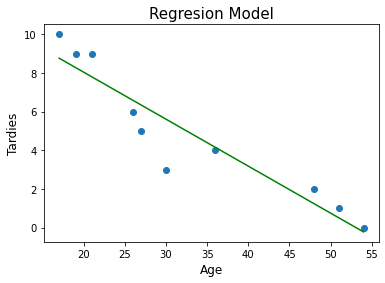

In [70]:
# Your code here.

plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Regresion Model', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Tardies', fontsize=12)

x_2 = [student_data['Age'].min(), student_data['Age'].max()]
y_2 = [slope*student_data['Age'].min() + intercept, slope*student_data['Age'].max() + intercept]
plt.plot(x_2, y_2, color='g');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

# regression model indicates that age is a factor that influences in the delays of the students at class.
# with a p-value 5.57e-05 (near to 0) the null hypothesis is rejected (no matter the age of the students to be late)
# and the R-squared = 88.2% (0.882) indicates that the data is close to the fit of the regression line.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [55]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [64]:
# Your response here. 

y = vehicles['CO2 Emission Grams/Mile']
vehicles_var = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles_var.corr()[['CO2 Emission Grams/Mile']].sort_values(by='CO2 Emission Grams/Mile', ascending=False)

,CO2 Emission Grams/Mile
CO2 Emission Grams/Mile,1.000000
Fuel Barrels/Year,0.986189
Fuel Cost/Year,0.930865
Cylinders,0.752393
Year,-0.222300
Combined MPG,-0.926229


In [ ]:
# the most related directly proportional variable with CO2 Emission Grams/Mile is Fuel Barrels/Year
# and the most inversely related variable is Combined MPG

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [66]:
# Your response here. 

X = sm.add_constant(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']])
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                             11:29:40   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/anahiolmos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# the variable with a higher coeficient is Fuel Barrels/Year (19.0529)
# which makes sense for the amount of CO2 emissions in the combustion effect of the motor and fuel it consumes.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [67]:
# Your code here. 

people = pd.DataFrame({'Invited':[1, 3, 4, 6, 8, 9, 11, 14], 'Attended':[1, 2, 4, 4, 5, 7, 8, 13]})
people

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [71]:
slope, intercept, rvale, pvalue, stderr = linregress(people['Invited'], people['Attended'])

slope, intercept

(0.8484848484848485, -0.43939393939393945)

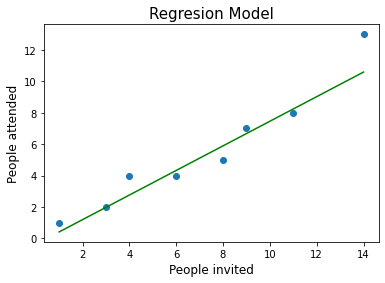

In [72]:
# Your code here.

plt.scatter(people['Invited'], people['Attended'])
plt.title('Regresion Model', fontsize=15)
plt.xlabel('People invited', fontsize=12)
plt.ylabel('People attended', fontsize=12)

x_2 = [people['Invited'].min(), people['Invited'].max()]
y_2 = [slope*people['Attended'].min() + intercept, slope*people['Attended'].max() + intercept]
plt.plot(x_2, y_2, color='g');

In [75]:
X = sm.add_constant(people['Invited'])
Y = people['Attended']

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           0.000102
Time:                        11:44:37   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

/Users/anahiolmos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/anahiolmos/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

# the R-squared = 93.2% (0.932) indicates that the data is very close to the fit of the regression line.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

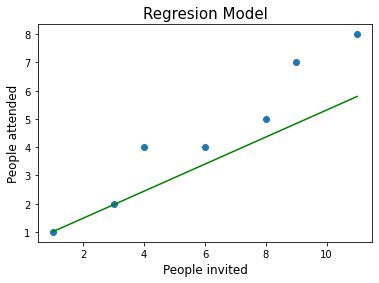

In [76]:
# Your response here. 

# it seems to be one outlier (14, 13)

people_2 = pd.DataFrame({'Invited':[1, 3, 4, 6, 8, 9, 11], 'Attended':[1, 2, 4, 4, 5, 7, 8]})

slope, intercept, rvale, pvalue, stderr = linregress(people_2['Invited'], people_2['Attended'])

plt.scatter(people_2['Invited'], people_2['Attended'])
plt.title('Regresion Model', fontsize=15)
plt.xlabel('People invited', fontsize=12)
plt.ylabel('People attended', fontsize=12)

x_2 = [people_2['Invited'].min(), people_2['Invited'].max()]
y_2 = [slope*people_2['Attended'].min() + intercept, slope*people_2['Attended'].max() + intercept]
plt.plot(x_2, y_2, color='g');

In [77]:
X = sm.add_constant(people_2['Invited'])
Y = people_2['Attended']

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Attended   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           0.000264
Time:                        11:48:22   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

/Users/anahiolmos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/anahiolmos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# although graphicaly the data seems to be more separated to the line than the past regression lineal
# the R-squared is greater, now is 94.3 % vs. 93.2% 
# by removing the outlier, the regression line is closer to the points.